# Projeto_Desafio: Machine Learning

Ola, Cientistas!

Para este desafio, você irá utilizar um conjunto de dados com aproximadamente 52 carros usados das empresas autotrader e carfax. A base de dados "cars.csv" contém um conjunto de características sobre carros usados, tais como marca, modelo, ano, quilometragem, quilometragem urbana e rodoviária, potência, torque, capacidade do motor, capacidade de combustível, número de cilindros , número de assentos, número de proprietários, preço, link, condição, tipo, número de portas, tração nas rodas, tipo de motor, níveis de velocidade, altura livre dianteira, espaço para pernas dianteiro, altura livre traseira, espaço para pernas traseiro e registros de serviço.

Utilizando essa base de dados, você tem o desafio de criar uma análise exploratória sobre os dados, seguindo os passos a seguir.

Então, bora colocar a mão na massa?

## **Parte 1:** 

* Utilizando a biblioteca de manipulacao de dados, o Pandas, realize o upload da base de dados no Python para iniciar as análises.

* Ainda utilizando as ferramentas do Pandas, realize análises estatísticas descritivas sobre os dados, explorando todas as variáveis do modelo: variaveis qualitativas e quantitativas.

In [216]:
import pandas as pd

In [217]:
data = 'https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Desafio/cars.csv'

In [218]:
dados = pd.read_csv(data, sep=',')

In [219]:
dados.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [220]:
dados.shape

(52, 27)

In [221]:
dados.columns

Index(['id', 'brand', 'model', 'year', 'miles', 'city_mileage',
       'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre',
       'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price',
       'link', 'condition', 'type', 'doors', 'wheel_drive', 'engine_type',
       'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom',
       'rear_legroom', 'service_records'],
      dtype='object')

In [222]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [223]:
duplicates = dados[dados.duplicated('id', keep=False)]
duplicates

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records


In [224]:
dados.set_index('id', inplace=True)

In [225]:
dados.isnull().sum()

brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [226]:
set(dados.engine_type)

{'gas', 'hybrid_gas_electric'}

In [227]:
dados['condition'].unique()

array([nan,  4.])

In [228]:
dados = dados.drop('condition', axis=1)

In [229]:
dados['speed_levels'].unique()

array([ 6., nan,  8.,  7.,  9.])

In [230]:
dados['speed_levels'].fillna(value=0, inplace=True)

C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3029136854.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [231]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52.0,2018.673077,1.396370,2014.0,2018.000,2019.0,2019.25,2022.0
miles,52.0,33901.250000,22700.646139,5000.0,16454.750,27448.5,42442.00,97027.0
city_mileage,52.0,29.038462,5.947356,17.0,26.500,30.0,30.00,55.0
highway_mileage,52.0,37.423077,4.136619,24.0,35.750,38.0,40.00,49.0
horsepower,52.0,176.865385,33.793507,143.0,152.000,159.5,192.00,288.0
torque,52.0,177.923077,47.256433,99.0,138.000,181.0,192.00,294.0
engine_capacity_litre,52.0,1.832692,0.379743,1.4,1.500,2.0,2.00,3.5
fuel_capacity,52.0,14.232692,2.603973,7.0,12.400,13.6,15.05,19.0
num_cylinder,52.0,4.038462,0.277350,4.0,4.000,4.0,4.00,6.0
num_seat,52.0,5.000000,0.000000,5.0,5.000,5.0,5.00,5.0


In [232]:
variaveis_qualitativas = dados.select_dtypes(include=['object', 'category']).columns.tolist()
variaveis_quantitativas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variáveis Qualitativas:", variaveis_qualitativas)
print("Variáveis Quantitativas:", variaveis_quantitativas)

Variáveis Qualitativas: ['brand', 'model', 'link', 'type', 'engine_type']
Variáveis Quantitativas: ['year', 'miles', 'city_mileage', 'highway_mileage', 'horsepower', 'torque', 'engine_capacity_litre', 'fuel_capacity', 'num_cylinder', 'num_seat', 'num_owners', 'price', 'doors', 'wheel_drive', 'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom', 'rear_legroom', 'service_records']


In [233]:
variaveis_qualitativas.remove('link')

In [234]:
print(variaveis_qualitativas)

['brand', 'model', 'type', 'engine_type']


Após a análise dos dados, identificamos que algumas variáveis não são relevantes para a nossa análise de preço e podem ser descartadas. As variáveis que não contribuem de maneira significativa para entender as flutuações de preço incluem:

* Número de Assentos: Todos os veículos têm a mesma configuração de 5 assentos, tornando esta variável redundante.
* Condição: Esta variável está vazia e não fornece informações úteis para a análise.
* Tipo: Todos os veículos estão classificados como Sedan, o que faz dessa variável não informativa.
* Link: O link para visualizar o veículo não é relevante para nossa análise de preços neste estágio.


## **Parte 2:**
* Utilize bibliotecas de visualização de dados em Python para realizar a análise exploratória dos dados, utilizando tecnicas de storytelling.

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### *Exploração das Características dos Carros*

* **Distribuição das Marcas**

C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\2504089261.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




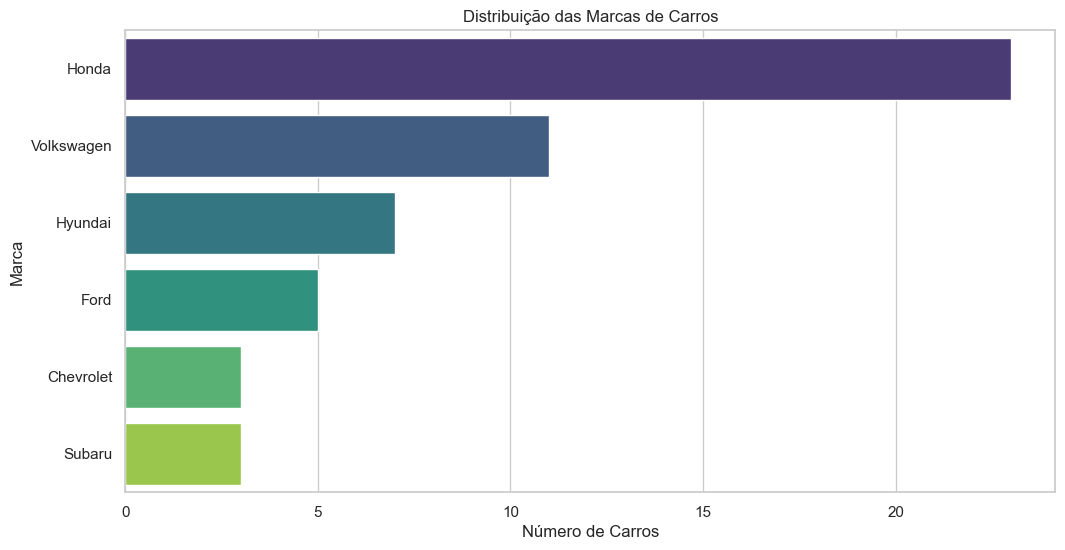

In [236]:
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=dados, order=dados['brand'].value_counts().index, palette='viridis')
plt.title('Distribuição das Marcas de Carros')
plt.xlabel('Número de Carros')
plt.ylabel('Marca')
plt.show()

* **Distribuição dos Anos dos Carros**

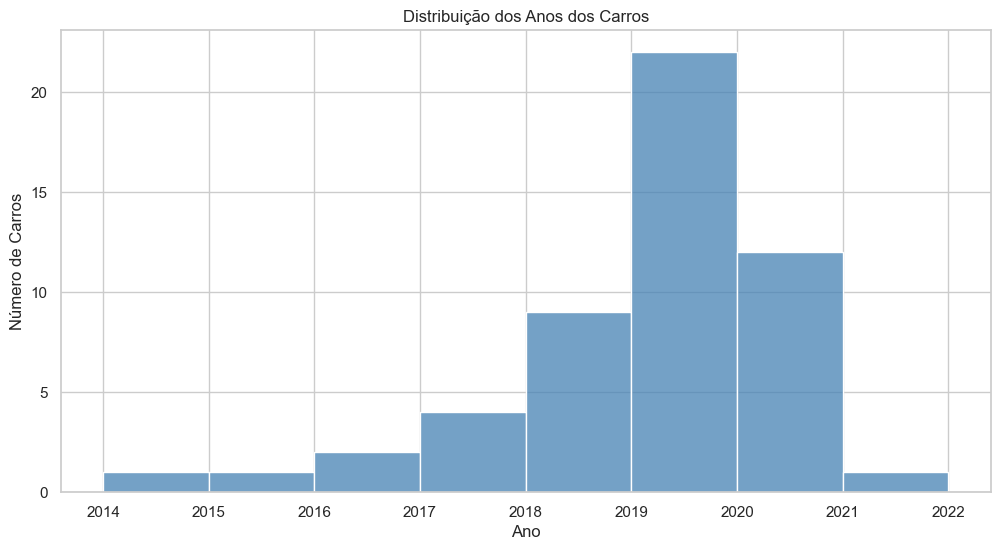

In [237]:
plt.figure(figsize=(12, 6))
sns.histplot(dados['year'], bins=range(int(dados['year'].min()), int(dados['year'].max()) + 1), kde=False, color='steelblue')
plt.title('Distribuição dos Anos dos Carros')
plt.xlabel('Ano')
plt.ylabel('Número de Carros')
plt.show()

### Análise de Preço

* **Preço por Marca**

C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\2320564278.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




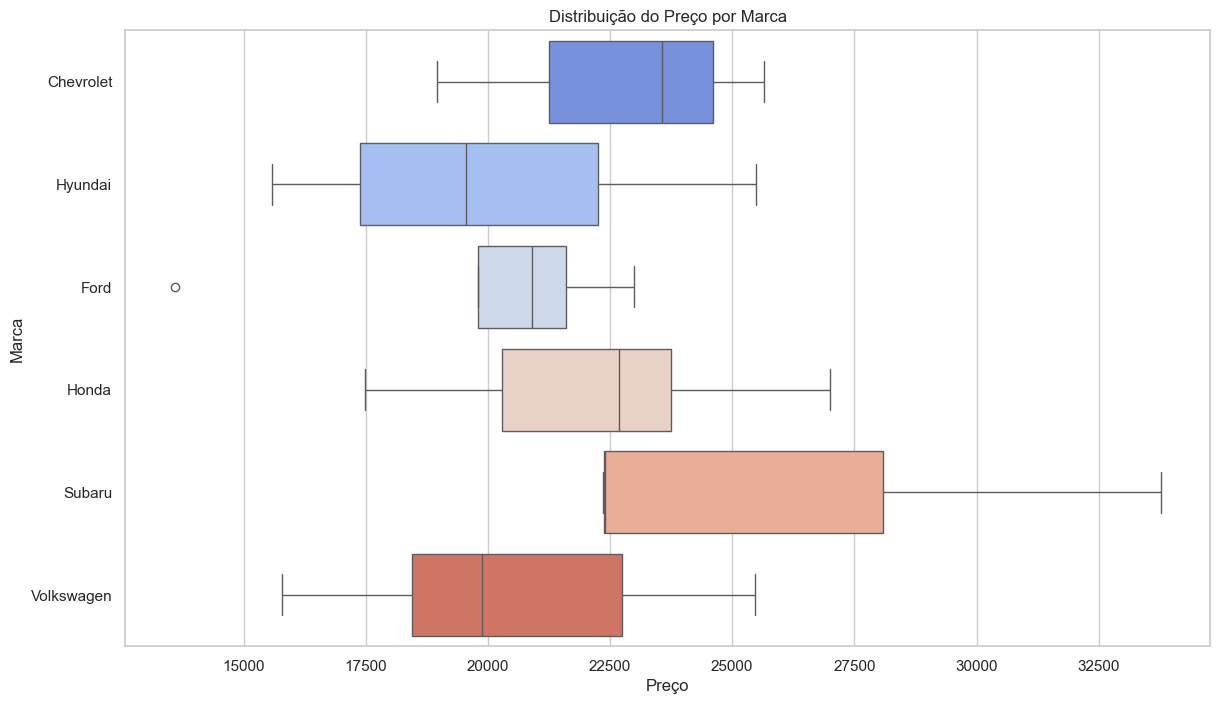

In [238]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='brand', data=dados, palette='coolwarm')
plt.title('Distribuição do Preço por Marca')
plt.xlabel('Preço')
plt.ylabel('Marca')
plt.show()

* **Preço por Tipo de Carro**

C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\4131515645.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




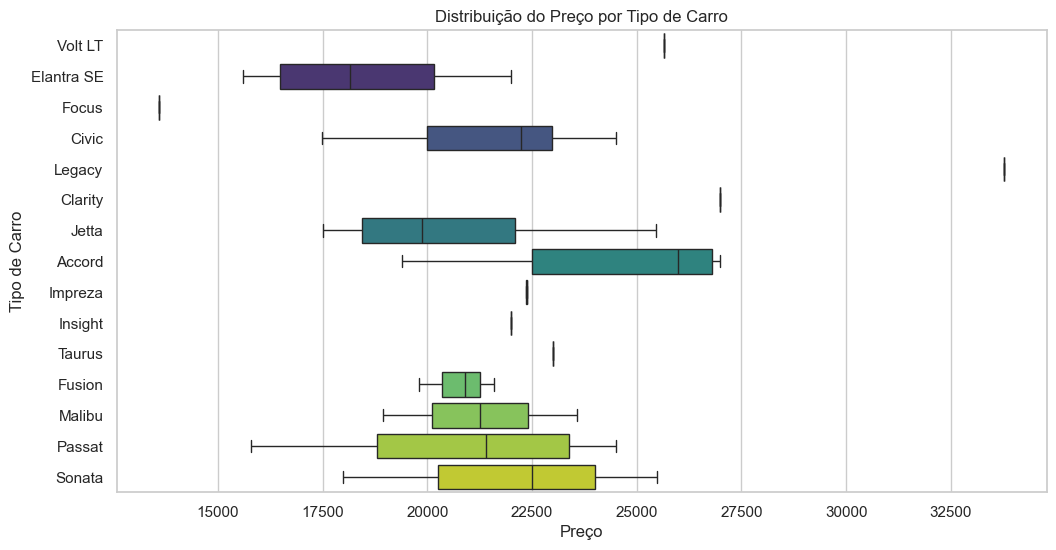

In [239]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='model', data=dados, palette='viridis')
plt.title('Distribuição do Preço por Tipo de Carro')
plt.xlabel('Preço')
plt.ylabel('Tipo de Carro')
plt.show()

* **Relação entre Preço e Quilometragem**

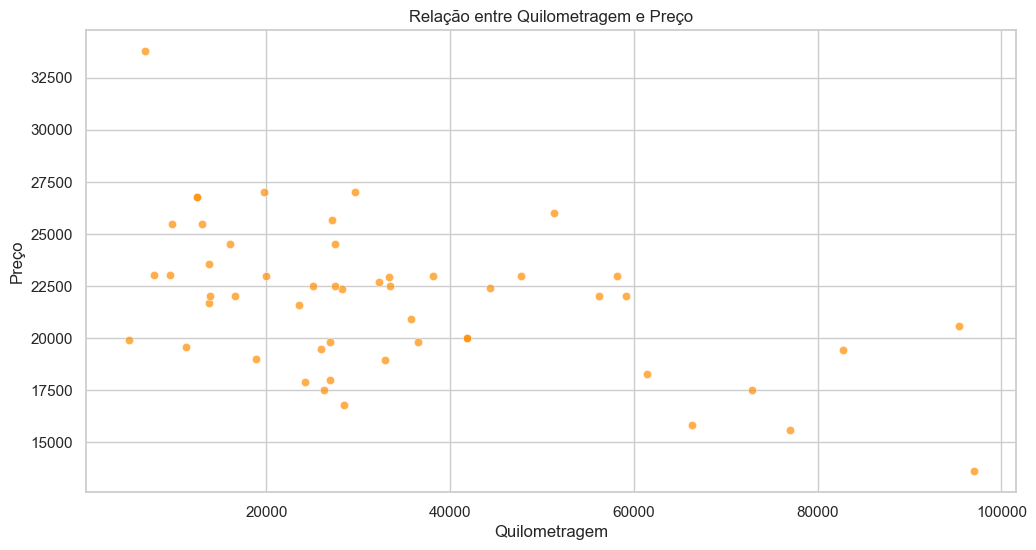

In [240]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='miles', y='price', data=dados, color='darkorange', alpha=0.7)
plt.title('Relação entre Quilometragem e Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
#plt.xscale('log')  # Usar escala logarítmica para melhorar a visualização
#plt.yscale('log')
plt.show()

* **Análise Interativa de Preço por Marca**

In [241]:
fig = px.box(dados, x='price', y='brand', color='brand', title='Distribuição do Preço por Marca')
fig.update_layout(xaxis_title='Preço', yaxis_title='Marca')
fig.show()

* **Análise Interativa de Preço por Tipo de Combustível do Carro**

In [242]:
fig = px.box(dados, x='price', y='engine_type', color='engine_type', title='Distribuição do Preço por Tipo de Combustivel do Carro')
fig.update_layout(xaxis_title='Preço', yaxis_title='tipo de combustivel')
fig.show()

In [243]:
dados.columns

Index(['brand', 'model', 'year', 'miles', 'city_mileage', 'highway_mileage',
       'horsepower', 'torque', 'engine_capacity_litre', 'fuel_capacity',
       'num_cylinder', 'num_seat', 'num_owners', 'price', 'link', 'type',
       'doors', 'wheel_drive', 'engine_type', 'speed_levels', 'front_headroom',
       'front_legroom', 'rear_headroom', 'rear_legroom', 'service_records'],
      dtype='object')

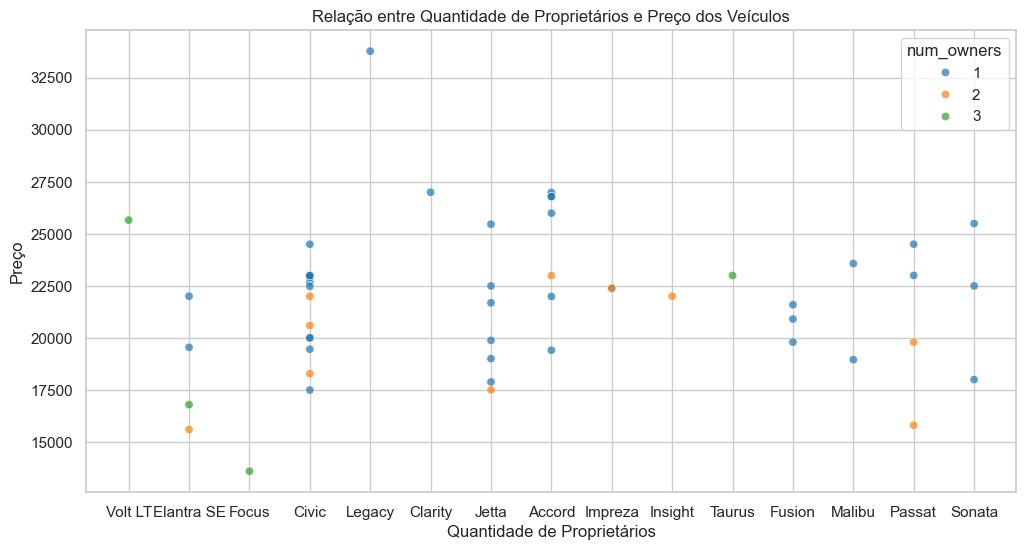

In [244]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='model', y='price',hue='num_owners', data=dados, color='darkblue', alpha=0.7, palette='tab10')
plt.title('Relação entre Quantidade de Proprietários e Preço dos Veículos')
plt.xlabel('Quantidade de Proprietários')
plt.ylabel('Preço')
plt.grid(True)
#plt.yscale('log')  # Usar escala logarítmica para melhorar a visualização, se necessário
plt.show()

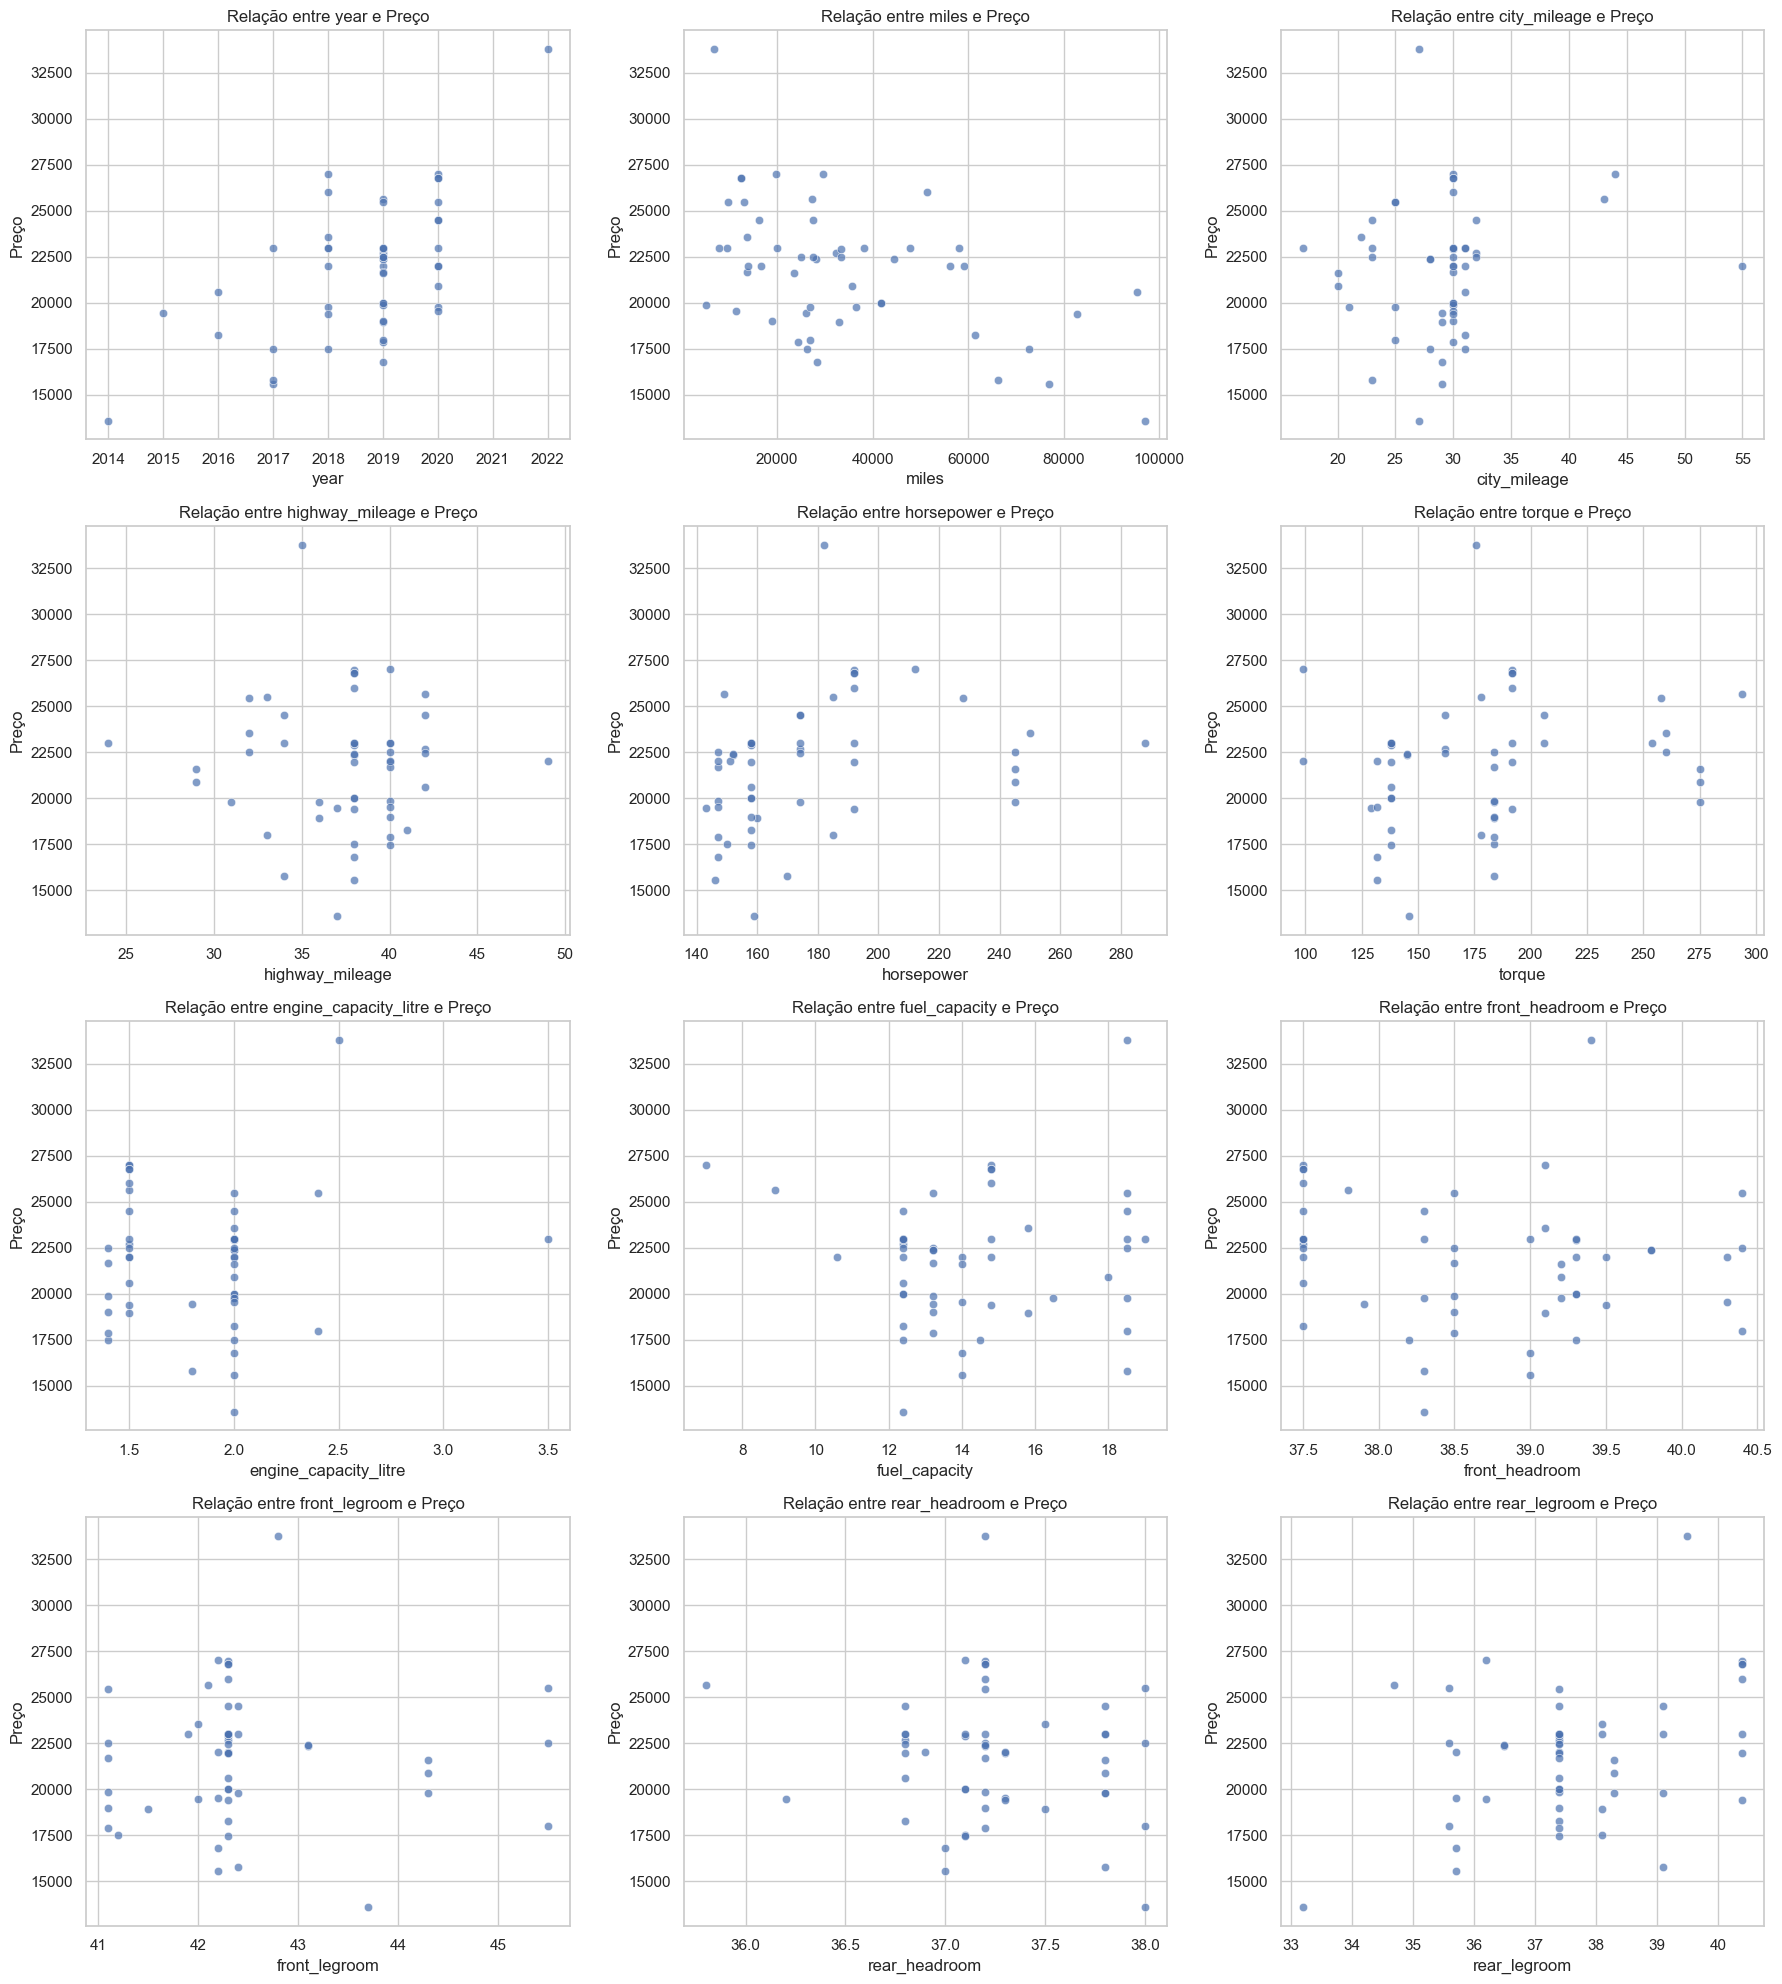

In [245]:
# Gráficos de Dispersão
variaveis_continuas = ['year', 'miles', 'city_mileage', 'highway_mileage', 
                       'horsepower', 'torque', 'engine_capacity_litre', 
                       'fuel_capacity', 'front_headroom', 'front_legroom', 
                       'rear_headroom', 'rear_legroom']

# Calcular o número de linhas e colunas para os subplots
n = len(variaveis_continuas)
ncols = 3  # Número de colunas desejado
nrows = (n + ncols - 1) // ncols  # Número de linhas necessário para acomodar todos os gráficos

# Criar a figura e os subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajustar o espaçamento entre subplots

# Criar gráficos de dispersão
for i, var in enumerate(variaveis_continuas):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(x=var, y='price', data=dados, ax=ax, alpha=0.7)
    ax.set_title(f'Relação entre {var} e Preço')
    ax.set_xlabel(var)
    ax.set_ylabel('Preço')
    #ax.set_yscale('log')
    ax.grid(True)

# Remover os eixos não utilizados se houver
for i in range(len(variaveis_continuas), nrows * ncols):
    fig.delaxes(axes.flatten()[i])

# Mostrar os gráficos
plt.tight_layout()
plt.show()



C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3090030305.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3090030305.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3090030305.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3090030305.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

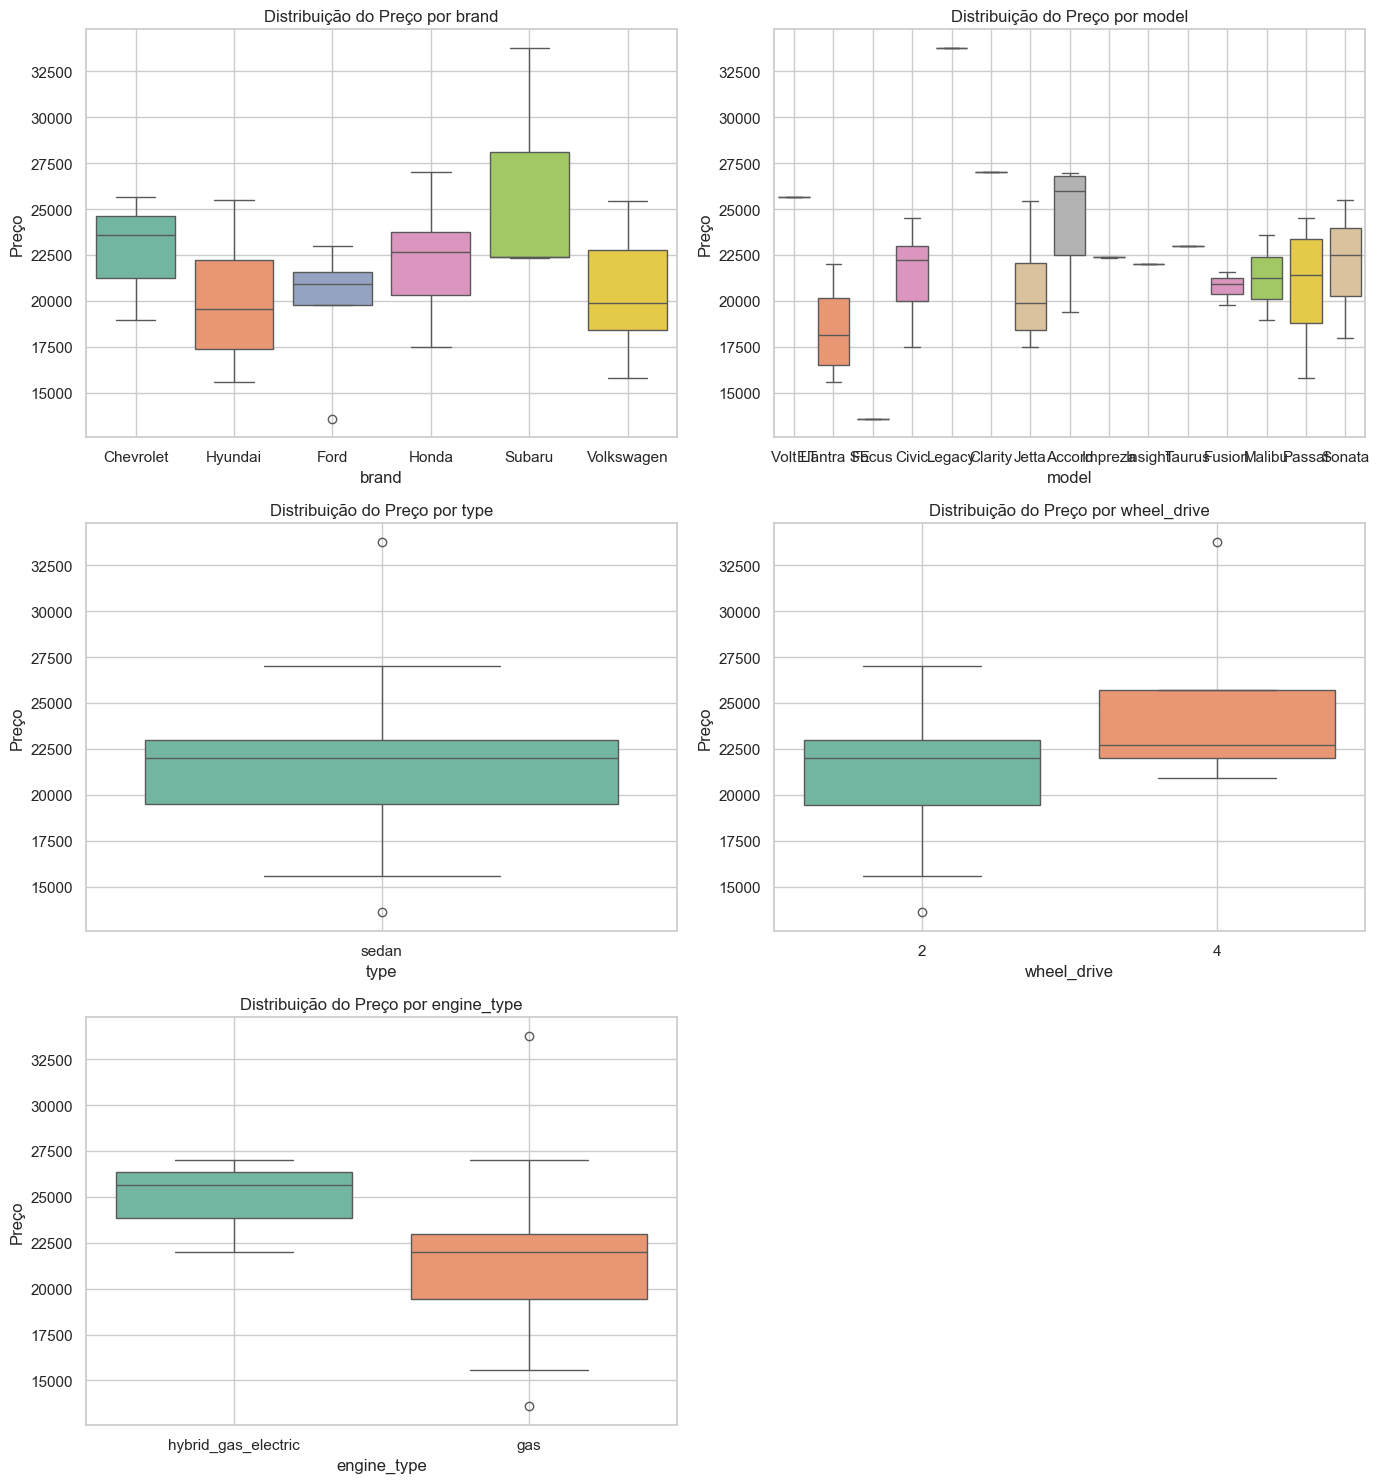

In [246]:
# Variáveis categóricas
variaveis_categoricas = ['brand', 'model', 'type', 'wheel_drive', 'engine_type']

# Calcular o número de linhas e colunas para os subplots
n = len(variaveis_categoricas)
ncols = 2  # Número de colunas desejado
nrows = (n + ncols - 1) // ncols  # Número de linhas necessário para acomodar todos os gráficos

# Criar a figura e os subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajustar o espaçamento entre subplots

# Criar gráficos de boxplot
for i, var in enumerate(variaveis_categoricas):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.boxplot(x=var, y='price', data=dados, ax=ax, palette='Set2')
    ax.set_title(f'Distribuição do Preço por {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Preço')
    #ax.set_yscale('log')
    ax.grid(True)

# Remover os eixos não utilizados se houver
for i in range(len(variaveis_categoricas), nrows * ncols):
    fig.delaxes(axes.flatten()[i])

# Mostrar os gráficos
plt.tight_layout()
plt.show()

## **Parte 3:** 
Com base em suas análises exploratórias, formule hipóteses estatísticas. Valide os testes e explique se as hipóteses foram aceitas.

### *Hipóteses Estatísticas*

* **Relação entre Quilometragem e Preço**

In [247]:
from scipy.stats import pearsonr

# Calcular a correlação de Pearson
correlacao, p_value = pearsonr(dados['miles'], dados['price'])

print(f'Correlação: {correlacao:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Existe uma relação significativa entre quilometragem e preço.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente de uma relação significativa entre quilometragem e preço.")

Correlação: -0.50
Valor-p: 0.0002
Rejeitamos a hipótese nula. Existe uma relação significativa entre quilometragem e preço.


* Correlação: -0.50 significa que há uma relação negativa moderada entre a quilometragem e o preço dos veículos. Isso quer dizer que, geralmente, quanto mais quilometragem o carro tem, menor tende a ser o seu preço.

* Valor-p: 0.0002 é muito pequeno. Isso indica que há uma relação significativa entre quilometragem e preço. Em outras palavras, os dados mostram uma forte evidência de que a quilometragem afeta o preço dos carros.

* **Impacto do Ano de Fabricação no Preço**

In [248]:
import statsmodels.api as sm

# Preparar os dados
X = dados[['year']]
X = sm.add_constant(X)  # Adicionar constante para o intercepto
y = dados['price']

# Ajustar o modelo
model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretar o resultado
# Verifique o valor-p para o coeficiente de 'year'

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.51
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           6.23e-06
Time:                        18:00:05   Log-Likelihood:                -487.39
No. Observations:                  52   AIC:                             978.8
Df Residuals:                      50   BIC:                             982.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.947e+06   5.88e+05     -5.014      0.0

* **Informações Gerais:**
* Dependente: price
* Modelo: OLS (Least Squares)
* Número de Observações: 52
* R-squared (Coeficiente de Determinação) de 0.338 indica que aproximadamente 33.8% da variação no preço dos veículos é explicada pelo ano de fabricação. Isso sugere que o modelo captura uma parte significativa da variação no preço, mas ainda há uma quantidade considerável de variabilidade não explicada.
* Adj. R-squared (R-squared Ajustado) de 0.325 é ligeiramente menor que o R-squared, ajustado para o número de variáveis no modelo. Isso confirma que o ano de fabricação é uma variável explicativa relevante, mas o ajuste ainda é limitado.
* F-statistic de 25.51 com um valor-p muito pequeno (6.23e-06) indica que o modelo é estatisticamente significativo, ou seja, ao menos uma das variáveis independentes é significativa para prever o preço.
* Prob (F-statistic): 6.23e-06

* O coeficiente do intercepto é -2.947 milhões, o que é o valor esperado do preço quando o ano é zero (o que não faz sentido na prática, mas é uma parte do modelo de regressão).
*O coeficiente para year é 1470.42. Isso significa que, para cada aumento de um ano no veículo, o preço esperado aumenta em aproximadamente 1470.42 unidades (na moeda usada).

* Estatísticas dos Coeficientes:
* Std err (Erro padrão): Indica a precisão dos coeficientes estimados. Coeficientes com erros padrões baixos são mais confiáveis.
* t e P>|t|: Testam a hipótese de que o coeficiente é igual a zero. Um valor-p menor que 0.05 sugere que o coeficiente é estatisticamente significativo. Neste caso, o valor-p para o ano é 0.000, indicando alta significância estatística. Em outras palavras, há uma forte evidência de que o ano de fabricação (year) tem um efeito significativo sobre o preço dos veículos.

* Diagnósticos:
* Omnibus e Jarque-Bera: Testam a normalidade dos resíduos. Ambos os testes sugerem que a distribuição dos resíduos não é significativamente diferente de uma distribuição normal.
* Durbin-Watson: Testa a autocorrelação dos resíduos. Um valor próximo de 2 sugere que não há autocorrelação dos resíduos. O valor de 1.955 é próximo de 2, o que é um bom sinal.
* Cond. No. (Número de Condição): Um número grande (2.95e+06) sugere possíveis problemas de multicolinearidade ou outros problemas numéricos.

* **Diferença de Preço por Tipo de Carro**

In [249]:
from scipy.stats import f_oneway

# Agrupar preços por tipo de carro
tipos = dados['model'].unique()
precos_por_tipo = [dados[dados['model'] == tipo]['price'] for tipo in tipos]

# Realizar o teste ANOVA
f_stat, p_value = f_oneway(*precos_por_tipo)

print(f'Estatística F: {f_stat:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Existe uma diferença significativa no preço médio entre os tipos de carros.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente de diferença significativa no preço médio entre os tipos de carros.")

Estatística F: 3.63
Valor-p: 0.0008
Rejeitamos a hipótese nula. Existe uma diferença significativa no preço médio entre os tipos de carros.


* Aqui estamos testando se há uma diferença significativa no preço médio entre diferentes tipos de carros. Um valor-p pequeno indica que sim, há diferenças significativas nos preços entre os tipos de carros.

 *Resumo Simplificado*

*Rejeitar a Hipótese Nula: Significa que os dados mostram evidências suficientes para acreditar que há uma relação ou diferença significativa.*

*Correlação: A quilometragem tem uma relação negativa com o preço dos carros.*

*Modelo de Regressão: O ano do carro explica uma parte do preço, mas não todo o preço.*

*Coeficientes: O ano do carro influencia o preço, e o modelo é significativo.*

*Diagnósticos: O modelo parece estar bem ajustado, mas pode haver alguns problemas numéricos a serem investigados.*

### Para Saber Mais:


Problemas de multicolinearidade e outros problemas numéricos em modelos de regressão podem afetar a qualidade e a interpretação dos resultados. Vou explicar cada um desses problemas e suas implicações:

1. Multicolinearidade
Multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas entre si. Em outras palavras, há uma relação linear significativa entre as variáveis independentes, o que pode causar vários problemas:

Implicações da Multicolinearidade
Estimativas Imprecisas dos Coeficientes:

Quando há alta multicolinearidade, os coeficientes estimados do modelo podem se tornar imprecisos e instáveis. Pequenas mudanças nos dados podem levar a grandes variações nos coeficientes.
Redução da Significância Estatística:

A multicolinearidade pode inflar os erros padrão dos coeficientes, fazendo com que os testes de significância estatística resultem em valores-p mais altos. Isso pode levar a uma falsa impressão de que algumas variáveis não são significativas.
Dificuldade na Interpretação:

Se duas variáveis independentes estão altamente correlacionadas, é difícil determinar o efeito individual de cada uma sobre a variável dependente.
Detectar Multicolinearidade
Matriz de Correlação: Uma alta correlação entre variáveis independentes pode ser um sinal de multicolinearidade.
VIF (Variance Inflation Factor): Mede o quanto a variância de um coeficiente é aumentada devido à colinearidade. Valores de VIF maiores que 10 podem indicar multicolinearidade.
Soluções
Remover Variáveis: Excluir uma das variáveis altamente correlacionadas.
Combinar Variáveis: Criar uma nova variável que combine as informações das variáveis correlacionadas.
Regularização: Usar técnicas como Ridge ou Lasso, que penalizam a complexidade do modelo e ajudam a lidar com a multicolinearidade.
2. Outros Problemas Numéricos
Problemas numéricos podem se referir a diversos problemas que afetam a estabilidade e a precisão do modelo. Esses problemas incluem:

a. Escalonamento dos Dados
Problema: Se as variáveis independentes têm escalas muito diferentes, o algoritmo de regressão pode ter dificuldades em convergir para uma solução estável.
Solução: Normalizar ou padronizar as variáveis para que tenham escalas semelhantes.
b. Condição Numérica (Número de Condição)
Problema: Um número de condição elevado indica que a matriz dos dados pode ser mal condicionada, o que pode levar a problemas de precisão na inversão da matriz e instabilidade nos coeficientes.
Solução: Regularização ou análise da matriz de correlação para identificar e corrigir variáveis problemáticas.
c. Dados Faltantes
Problema: Dados faltantes podem afetar a qualidade do ajuste do modelo.
Solução: Imputação de dados ou exclusão de casos com dados faltantes, dependendo do contexto e da quantidade de dados faltantes.
d. Outliers e Dados Influentes
Problema: Outliers ou pontos de dados influentes podem distorcer a análise de regressão e afetar a precisão dos coeficientes.
Solução: Análise de resíduos e identificação de outliers para decidir como tratá-los (por exemplo, remoção ou tratamento separado).

## **Passo 4:** 
* Realize uma análise de correlação entre as variáveis e identifique se o modelo possui variáveis
correlacionadas ou não, explicando os motivos e considerações.

* **Dados das Variáveis Quantitativas**

In [250]:
dados_quantitativo = dados[variaveis_quantitativas]
dados_quantitativo.head()

,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
id,,,,,,,,,,,,,,,,,,,,
3,2019,27173,43,42,149,294,1.5,8.9,4,5,3,25655,4,2,6.0,37.8,42.1,35.8,34.7,4
6,2017,76941,29,38,146,132,2.0,14.0,4,5,2,15590,4,2,6.0,39.0,42.2,37.0,35.7,16
7,2014,97027,27,37,159,146,2.0,12.4,4,5,3,13590,4,2,6.0,38.3,43.7,38.0,33.2,13
8,2016,95396,31,42,158,138,1.5,12.4,4,5,2,20590,4,2,6.0,37.5,42.3,36.8,37.4,26
9,2019,28405,29,38,147,132,2.0,14.0,4,5,3,16787,4,2,6.0,39.0,42.2,37.0,35.7,5


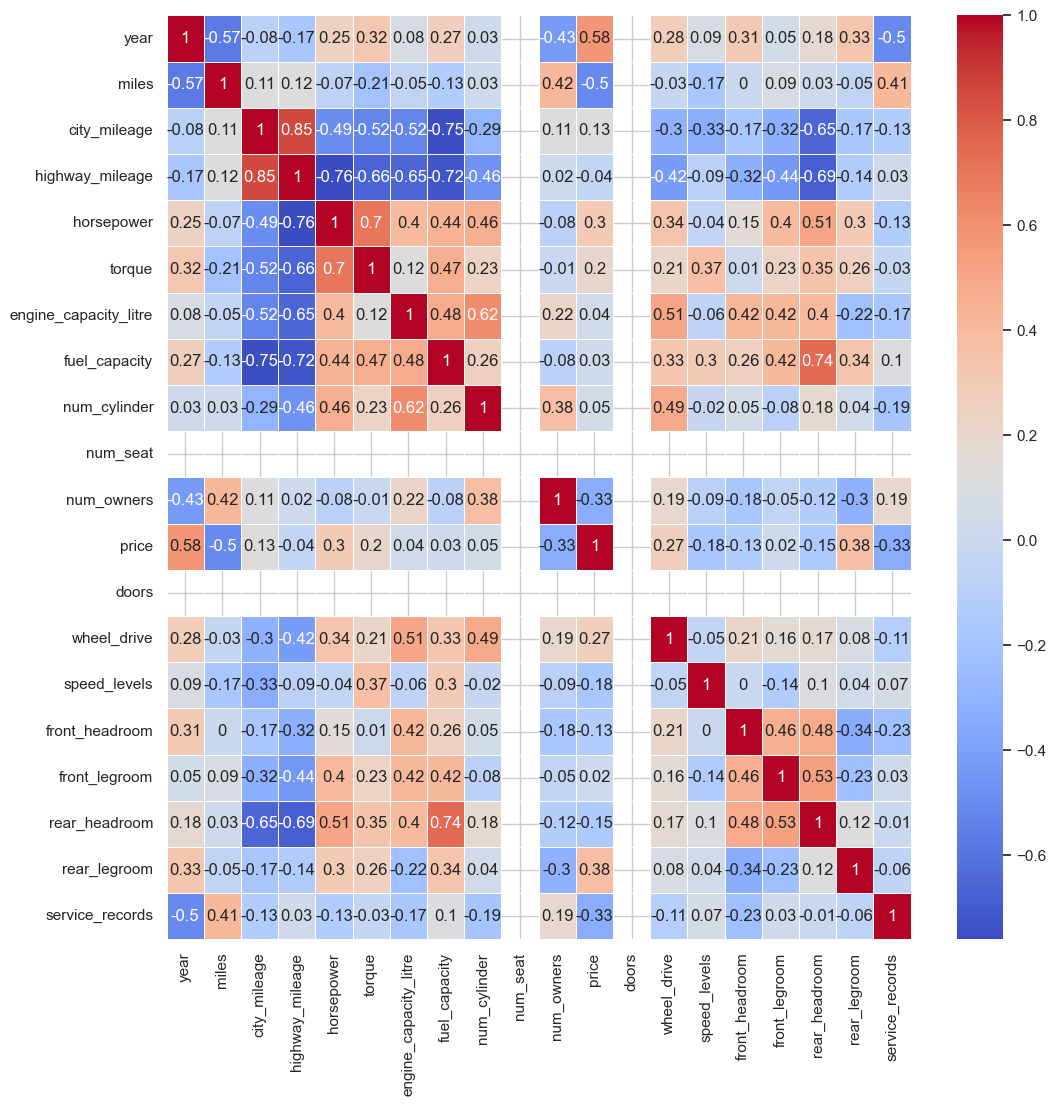

In [251]:
# Calcular a matriz de correlação
correlation_matrix_quant = dados_quantitativo.corr().round(2)

# Exibir a matriz de correlação --- print(correlation_matrix)

# Visualizar a matriz de correlação
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=correlation_matrix_quant, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

plt.show()

*Correlação Alta Positiva:*

* *city_mileage e highway_mileage (0.85): Isso sugere que carros com alta quilometragem urbana também tendem a ter alta quilometragem na estrada.*
* *price e year (0.58): Preços de carros tendem a aumentar com o ano de fabricação, indicando que carros mais novos tendem a ser mais caros.*
* *front_headroom e rear_legroom (0.33): Pode haver uma relação moderada onde mais espaço na frente pode estar associado a mais espaço na parte traseira.*

* **Dados das Variáveis Qualitativas**

In [252]:
print(variaveis_qualitativas)
dados_qualitativo = dados[variaveis_qualitativas]
dados_qualitativo.head()

['brand', 'model', 'type', 'engine_type']


,brand,model,type,engine_type
id,,,,
3,Chevrolet,Volt LT,sedan,hybrid_gas_electric
6,Hyundai,Elantra SE,sedan,gas
7,Ford,Focus,sedan,gas
8,Honda,Civic,sedan,gas
9,Hyundai,Elantra SE,sedan,gas


In [253]:
# label enconder, para dois valores
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
dados_qualitativo["engine_type"] = LabelEncoder.fit_transform(dados_qualitativo["engine_type"])


C:\Users\tamir\AppData\Local\Temp\ipykernel_6924\3175118650.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
dados_qualitativo.head()

,brand,model,type,engine_type
id,,,,
3,Chevrolet,Volt LT,sedan,1
6,Hyundai,Elantra SE,sedan,0
7,Ford,Focus,sedan,0
8,Honda,Civic,sedan,0
9,Hyundai,Elantra SE,sedan,0


In [255]:
# tecnica de one hot enconing, para variaveis com mais de dois valores:
dummy_brand = pd.get_dummies(dados_qualitativo["brand"], prefix="dummy")
dummy_model = pd.get_dummies(dados_qualitativo["model"], prefix="dummy")

dados_qualitativo_dummy = pd.concat([dados_qualitativo, dummy_brand, dummy_model], axis=1)

In [256]:
dados_qualitativo_dummy.drop(["brand", "model", "type"], axis=1, inplace=True)
# Excluindo coluna type porque contem apenas uma descrição 'sedan'

In [257]:
dados_qualitativo_dummy.head()

,engine_type,dummy_Chevrolet,dummy_Ford,dummy_Honda,dummy_Hyundai,dummy_Subaru,dummy_Volkswagen,dummy_Accord,dummy_Civic,dummy_Clarity,...,dummy_Fusion,dummy_Impreza,dummy_Insight,dummy_Jetta,dummy_Legacy,dummy_Malibu,dummy_Passat,dummy_Sonata,dummy_Taurus,dummy_Volt LT
id,,,,,,,,,,,,,,,,,,,,,
3,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


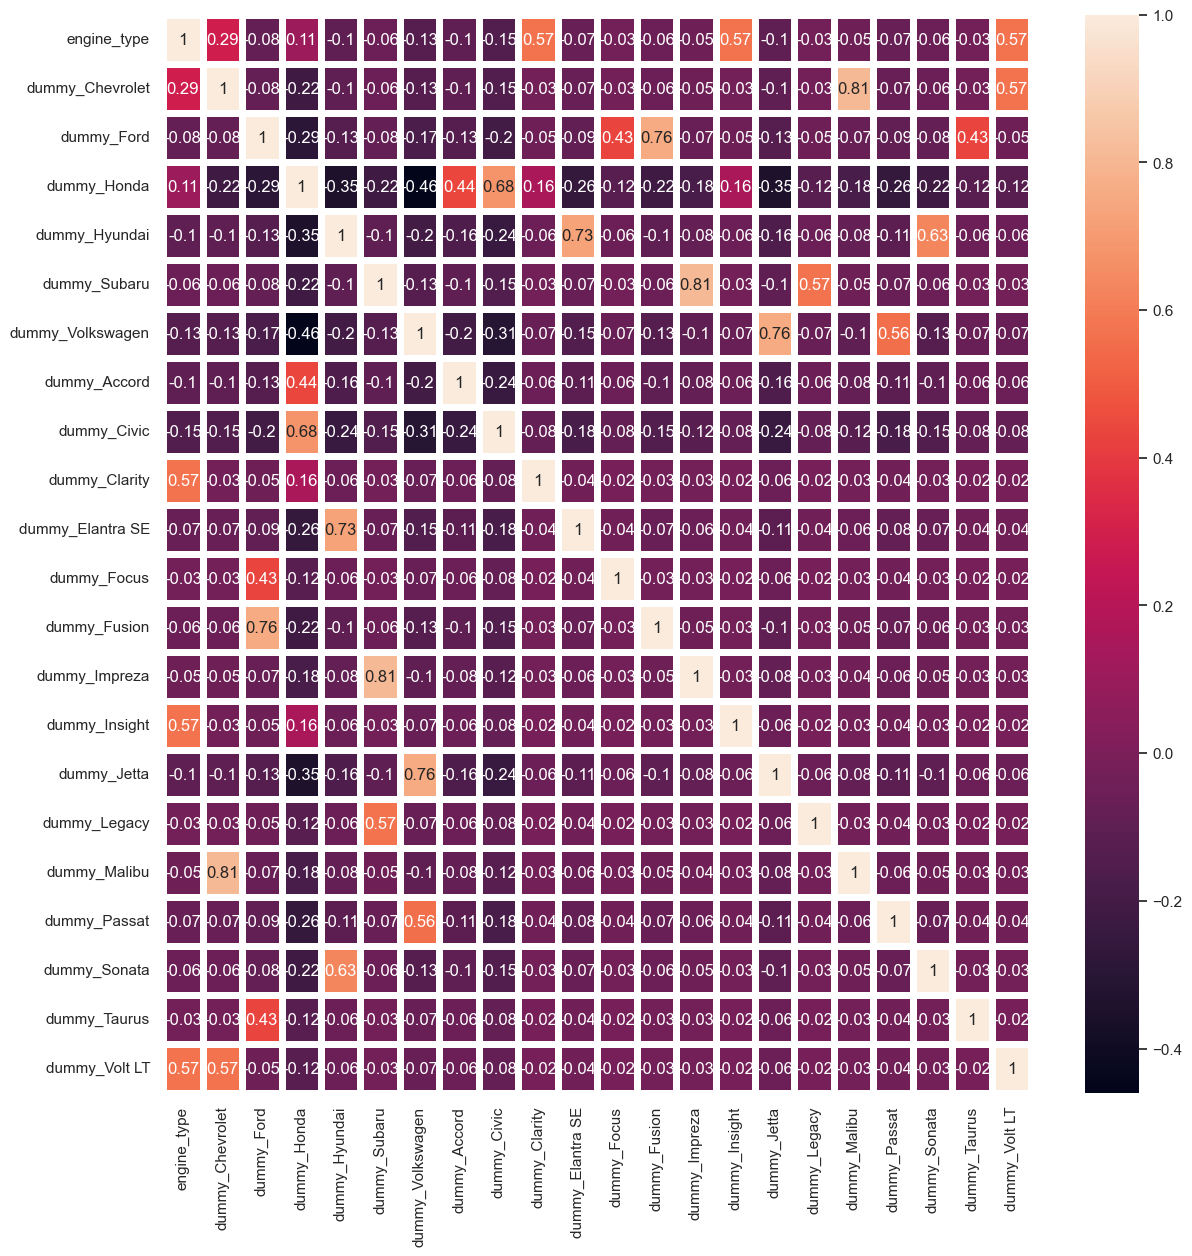

In [258]:
# Calculate the correlation matrix
correlation_matrix_qualit = dados_qualitativo_dummy.corr().round(2)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data=correlation_matrix_qualit, annot=True, linewidths=5, ax=ax)

plt.show()

## **Passo 5:**

* Identifique, com base nos dados, um cenário para construção de um modelo de regressão.
* Aponte qual a variável target configurada para o modelo e quais as variáveis independentes que
vão ser utilizadas para prever a sua target dependente.

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [286]:
dados_transformados = pd.concat([dados_quantitativo, dados_qualitativo_dummy], axis=1)
dados_transformados.head()

,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,...,dummy_Fusion,dummy_Impreza,dummy_Insight,dummy_Jetta,dummy_Legacy,dummy_Malibu,dummy_Passat,dummy_Sonata,dummy_Taurus,dummy_Volt LT
id,,,,,,,,,,,,,,,,,,,,,
3,2019,27173,43,42,149,294,1.5,8.9,4,5,...,False,False,False,False,False,False,False,False,False,True
6,2017,76941,29,38,146,132,2.0,14.0,4,5,...,False,False,False,False,False,False,False,False,False,False
7,2014,97027,27,37,159,146,2.0,12.4,4,5,...,False,False,False,False,False,False,False,False,False,False
8,2016,95396,31,42,158,138,1.5,12.4,4,5,...,False,False,False,False,False,False,False,False,False,False
9,2019,28405,29,38,147,132,2.0,14.0,4,5,...,False,False,False,False,False,False,False,False,False,False


In [287]:
dados_transformados.columns

Index(['year', 'miles', 'city_mileage', 'highway_mileage', 'horsepower',
       'torque', 'engine_capacity_litre', 'fuel_capacity', 'num_cylinder',
       'num_seat', 'num_owners', 'price', 'doors', 'wheel_drive',
       'speed_levels', 'front_headroom', 'front_legroom', 'rear_headroom',
       'rear_legroom', 'service_records', 'engine_type', 'dummy_Chevrolet',
       'dummy_Ford', 'dummy_Honda', 'dummy_Hyundai', 'dummy_Subaru',
       'dummy_Volkswagen', 'dummy_Accord', 'dummy_Civic', 'dummy_Clarity',
       'dummy_Elantra SE', 'dummy_Focus', 'dummy_Fusion', 'dummy_Impreza',
       'dummy_Insight', 'dummy_Jetta', 'dummy_Legacy', 'dummy_Malibu',
       'dummy_Passat', 'dummy_Sonata', 'dummy_Taurus', 'dummy_Volt LT'],
      dtype='object')

In [294]:
x = dados_transformados[['year', 'miles', 'city_mileage', 'highway_mileage', 'horsepower',
       'torque', 'num_owners','engine_type', 'dummy_Chevrolet',
       'dummy_Ford', 'dummy_Honda', 'dummy_Hyundai', 'dummy_Subaru',
       'dummy_Volkswagen', 'dummy_Accord', 'dummy_Civic', 'dummy_Clarity',
       'dummy_Elantra SE', 'dummy_Focus', 'dummy_Fusion', 'dummy_Impreza',
       'dummy_Insight', 'dummy_Jetta', 'dummy_Legacy', 'dummy_Malibu',
       'dummy_Passat', 'dummy_Sonata', 'dummy_Taurus', 'dummy_Volt LT' ]]
y = dados_transformados['price']

In [295]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [296]:
# Ajustar o modelo de regressão
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [297]:
print(x_train.shape)
print(x_test.shape)

(41, 29)
(11, 29)


In [298]:
# Fazer previsões
y_pred = model.predict(x_test)

## **Passo 6:** 
* Comprove estatisticamente se o modelo construído possui potencial preditivo utilizando métricas
estatísticas.

In [300]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')

Erro Quadrático Médio (MSE): 10272156.22
R²: -0.70


Erro Quadrático Médio (MSE):

O valor do MSE é 10.272.156,22, o que indica que, em média, as previsões do modelo estão muito longe dos valores reais. Um MSE alto como esse sugere que o modelo tem grandes erros de previsão.
R² (Coeficiente de Determinação):

O valor do R² é -0,70, que é negativo. Isso significa que o modelo está se saindo pior do que uma linha horizontal que simplesmente prediz a média dos valores de saída. Em outras palavras, o modelo está adicionando erro em vez de reduzir a incerteza na previsão.